In [33]:
#Import Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress

In [34]:
# Read in CSV file and create a DataFrame
raw_egg_df = pd.read_csv("../USDA_Eggs_2024.csv")

# Remove columns
raw_egg_df.drop(['office_name', 'office_code', 'office_city', 'office_state', 'published_date', 'commodity', 'slug_id', 'slug_name',
                'report_title', 'final_ind', 'report_date', 'community', 'condition', 'price_unit', 'price_min', 'price_max'], axis=1, inplace=True)
raw_egg_df

,report_begin_date,report_end_date,region,section,type,quality_grade,package_size,environment,price_avg,store_count
0,12/21/2024,12/27/2024,Southeast,Shell Egg,Jumbo White,A,12,Conventional,2.98,40
1,12/21/2024,12/27/2024,NATIONAL,Shell Egg,Jumbo White,NaN,12,Conventional,2.98,61
2,12/21/2024,12/27/2024,Midwest,Shell Egg,Jumbo White,A,12,Conventional,2.99,21
3,12/21/2024,12/27/2024,NATIONAL,Shell Egg,Medium White,NaN,12,Conventional,2.99,296
4,12/21/2024,12/27/2024,Southeast,Egg Products,Egg Nog,Ungraded/Other,64 oz,Conventional,5.88,54
...,...,...,...,...,...,...,...,...,...,...
2512,1/13/2024,1/19/2024,SouthEast,Shell Egg,BROWN LARGE,No Grade,NaN,"Cage-Free, USDA Organic",2.83,327
2513,1/13/2024,1/19/2024,MidWest,Shell Egg,WHITE LARGE,No Grade,NaN,Nutritionally Enhanced (Omega-3),2.64,97
2514,1/13/2024,1/19/2024,MidWest,Shell Egg,WHITE LARGE,No Grade,NaN,"Cage-Free, USDA Organic",2.55,124
2515,1/13/2024,1/19/2024,SouthCentral,Shell Egg,WHITE LARGE,No Grade,NaN,"Cage-Free, USDA Organic",1.99,3


In [35]:
# Filter for shell egg
filtered_df = raw_egg_df.loc[(raw_egg_df["section"] == "Shell Egg")]
filtered_df

# Find the weighted data_frame for true average
weighted_df = filtered_df[["report_begin_date", "report_end_date", "region", "section", "type", "quality_grade", "package_size", "environment", "price_avg", "store_count"]]
weighted_df["weighted"] = weighted_df["price_avg"] * weighted_df["store_count"] 
weighted_df
weighted_df["weighted"]= weighted_df["weighted"] / weighted_df["store_count"].sum()
weighted_df

,report_begin_date,report_end_date,region,section,type,quality_grade,package_size,environment,price_avg,store_count,weighted
0,12/21/2024,12/27/2024,Southeast,Shell Egg,Jumbo White,A,12,Conventional,2.98,40,0.000298
1,12/21/2024,12/27/2024,NATIONAL,Shell Egg,Jumbo White,NaN,12,Conventional,2.98,61,0.000454
2,12/21/2024,12/27/2024,Midwest,Shell Egg,Jumbo White,A,12,Conventional,2.99,21,0.000157
3,12/21/2024,12/27/2024,NATIONAL,Shell Egg,Medium White,NaN,12,Conventional,2.99,296,0.002209
6,12/21/2024,12/27/2024,Northwest,Shell Egg,Large Brown,A,12,"USDA Organic, Pasture Raised",8.34,30,0.000625
...,...,...,...,...,...,...,...,...,...,...,...
2511,1/13/2024,1/19/2024,NorthEast,Shell Egg,BROWN LARGE,No Grade,NaN,USDA Organic,5.99,22,0.000329
2512,1/13/2024,1/19/2024,SouthEast,Shell Egg,BROWN LARGE,No Grade,NaN,"Cage-Free, USDA Organic",2.83,327,0.002310
2513,1/13/2024,1/19/2024,MidWest,Shell Egg,WHITE LARGE,No Grade,NaN,Nutritionally Enhanced (Omega-3),2.64,97,0.000639
2514,1/13/2024,1/19/2024,MidWest,Shell Egg,WHITE LARGE,No Grade,NaN,"Cage-Free, USDA Organic",2.55,124,0.000789


In [36]:
# Select only relevant columns
environment_df = weighted_df[['report_begin_date', 'environment', 'price_avg']]
environment_df

,report_begin_date,environment,price_avg
0,12/21/2024,Conventional,2.98
1,12/21/2024,Conventional,2.98
2,12/21/2024,Conventional,2.99
3,12/21/2024,Conventional,2.99
6,12/21/2024,"USDA Organic, Pasture Raised",8.34
...,...,...,...
2511,1/13/2024,USDA Organic,5.99
2512,1/13/2024,"Cage-Free, USDA Organic",2.83
2513,1/13/2024,Nutritionally Enhanced (Omega-3),2.64
2514,1/13/2024,"Cage-Free, USDA Organic",2.55


In [37]:
#Filter so only USDA Organic and Conventional columns remain
filtered_env_df = environment_df[environment_df['environment'].isin(['USDA Organic', 'Conventional'])]
filtered_env_df
pretty_df = filtered_env_df.rename(columns={
    'report_begin_date': 'Date',
    'environment': 'Environment',
    'price_avg': 'Avg. Price'
})
pretty_df

,Date,Environment,Avg. Price
0,12/21/2024,Conventional,2.98
1,12/21/2024,Conventional,2.98
2,12/21/2024,Conventional,2.99
3,12/21/2024,Conventional,2.99
24,12/21/2024,USDA Organic,5.60
...,...,...,...
2507,1/13/2024,Conventional,2.50
2508,1/13/2024,Conventional,4.27
2509,1/13/2024,USDA Organic,5.31
2510,1/13/2024,Conventional,0.99


In [38]:
#Convert report begin date to date and sort values so January is first
#filtered_env_df['report_begin_date'] = pd.to_datetime(filtered_env_df['report_begin_date'])
#sorted_df = filtered_env_df.sort_values(by='report_begin_date')
#sorted_df
#filtered_env_df = filtered_env_df.set_index('report_begin_date')
#filtered_env_df

In [39]:
#Finding average price for date and environment that are the same
weekly_df = pretty_df.groupby(['Date', 'Environment'], as_index=False)['Avg. Price'].mean()
weekly_df

,Date,Environment,Avg. Price
0,1/13/2024,Conventional,2.376250
1,1/13/2024,USDA Organic,5.465714
2,1/20/2024,Conventional,1.925385
3,1/20/2024,USDA Organic,6.240000
4,1/27/2024,Conventional,2.280000
...,...,...,...
89,9/21/2024,USDA Organic,5.967500
90,9/28/2024,Conventional,5.602000
91,9/28/2024,USDA Organic,6.048000
92,9/7/2024,Conventional,3.268571


In [40]:
#Get average per month instead of by week
weekly_df['Date'] = pd.to_datetime(weekly_df['Date'])
weekly_df['Month'] = weekly_df['Date'].dt.to_period('M')
monthly_df = weekly_df.groupby(['Month', 'Environment'], as_index=False)['Avg. Price'].mean()
monthly_df

,Month,Environment,Avg. Price
0,2024-01,Conventional,2.193878
1,2024-01,USDA Organic,5.484286
2,2024-02,Conventional,2.278250
3,2024-02,USDA Organic,4.523611
4,2024-03,Conventional,2.703532
5,2024-03,USDA Organic,5.188672
6,2024-04,Conventional,2.059643
7,2024-04,USDA Organic,4.480313
8,2024-05,Conventional,1.932821
9,2024-05,USDA Organic,4.991062


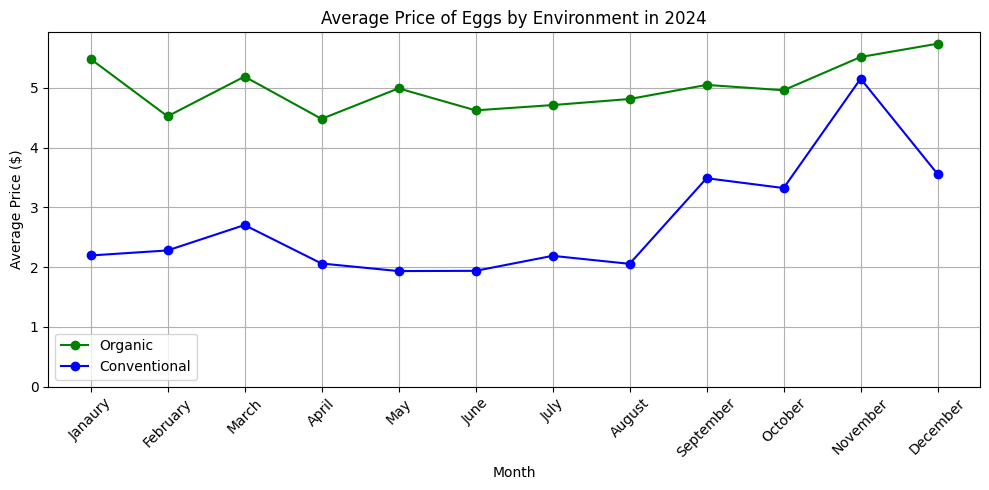

In [42]:
organic_df = monthly_df[monthly_df['Environment'] == 'USDA Organic']
conventional_df = monthly_df[monthly_df['Environment'] == 'Conventional']

x_axis = ['Janaury', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
tick_locations = [value for value in x_axis]
plt.figure(figsize=(10, 5))
plt.plot(x_axis, organic_df['Avg. Price'], color='green', marker='o', linestyle='-', label='Organic')
plt.plot(x_axis, conventional_df['Avg. Price'], color='blue', marker='o', linestyle='-', label='Conventional')

# Adding titles and labels
plt.title('Average Price of Eggs by Environment in 2024')
plt.xlabel('Month')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45)  # Rotate month labels for better readability
plt.legend()  # Show legend
plt.grid()
plt.ylim(bottom=0)

# Show the plot
plt.tight_layout()
plt.show()